<a href="https://colab.research.google.com/github/senthilv83/Data-Science-Challenges/blob/main/Challenge_1_Time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pystan~=2.14
!pip install fbprophet
!pip install neuralprophet[live]

In [ ]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
import time
import seaborn as sns
from neuralprophet import NeuralProphet
import numpy as np
from neuralprophet import set_random_seed
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
set_random_seed(0)

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/time_series.csv")
df.head(3)

,date,turnover
0,01-01-2007,51
1,01-02-2007,28
2,01-03-2007,30


In [ ]:
df.date.head(2)

0    01-01-2007
1    01-02-2007
Name: date, dtype: object

In [ ]:
len(df)

198

In [ ]:
df.drop_duplicates(subset=['date'],inplace=True)

In [ ]:
df.shape

(198, 2)

In [ ]:
df.isnull().sum()

date        0
turnover    0
dtype: int64

**FB prophet**

In [ ]:
model=Prophet()

In [ ]:
df.columns

Index(['date', 'turnover'], dtype='object')

In [ ]:
df.columns=['ds','y']

In [ ]:
df.head(5)

,ds,y
0,01-01-2007,51
1,01-02-2007,28
2,01-03-2007,30
3,01-04-2007,32
4,01-05-2007,31


In [ ]:
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
df.tail()

,ds,y
193,01-02-2021,217
194,01-03-2021,183
195,01-04-2021,231
196,01-05-2021,229
197,01-06-2021,194


In [ ]:
future_dates=model.make_future_dataframe(periods=24,freq='m')

In [ ]:
fbprophet_prediction=model.predict(future_dates)

In [ ]:
fbprophet_prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
193,2022-08-31,306.146354,242.979899,282.987138,305.149936,307.173320,-44.056813,-44.056813,-44.056813,-1.298293,-1.298293,-1.298293,-42.758520,-42.758520,-42.758520,0.0,0.0,0.0,262.089541
194,2022-09-30,307.798529,422.268231,462.968382,306.723257,308.889478,134.406692,134.406692,134.406692,2.313505,2.313505,2.313505,132.093187,132.093187,132.093187,0.0,0.0,0.0,442.205220
195,2022-10-31,309.505775,565.318256,606.879099,308.386953,310.662726,275.645712,275.645712,275.645712,-0.977357,-0.977357,-0.977357,276.623070,276.623070,276.623070,0.0,0.0,0.0,585.151487
196,2022-11-30,311.157949,408.024278,447.470425,309.936835,312.407323,117.154310,117.154310,117.154310,-1.298293,-1.298293,-1.298293,118.452604,118.452604,118.452604,0.0,0.0,0.0,428.312259
197,2022-12-31,312.865195,286.342545,324.970425,311.545099,314.194778,-6.941631,-6.941631,-6.941631,-1.335718,-1.335718,-1.335718,-5.605913,-5.605913,-5.605913,0.0,0.0,0.0,305.923564


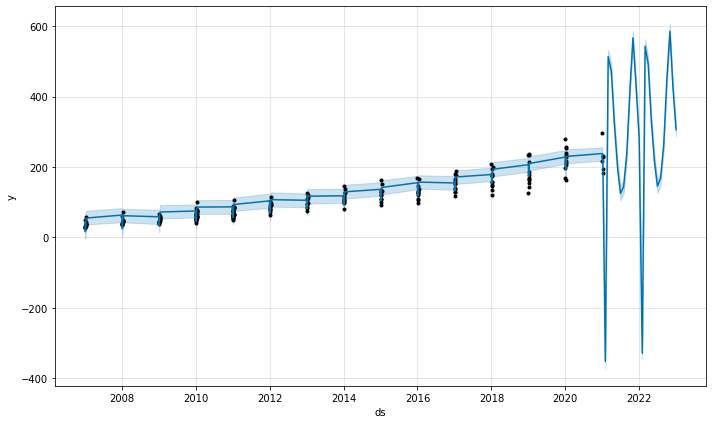

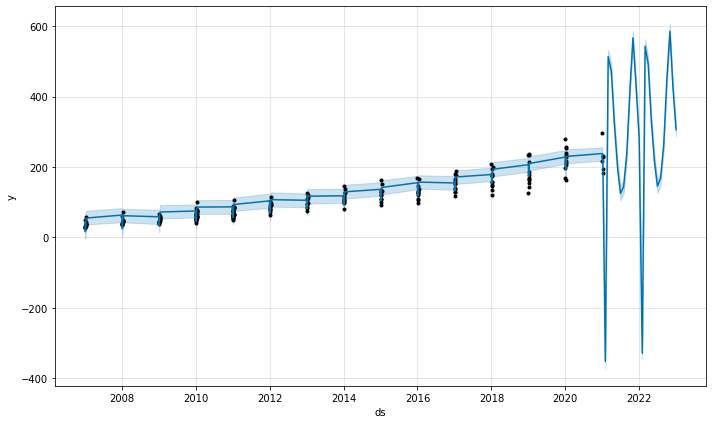

In [ ]:
model.plot(fbprophet_prediction)

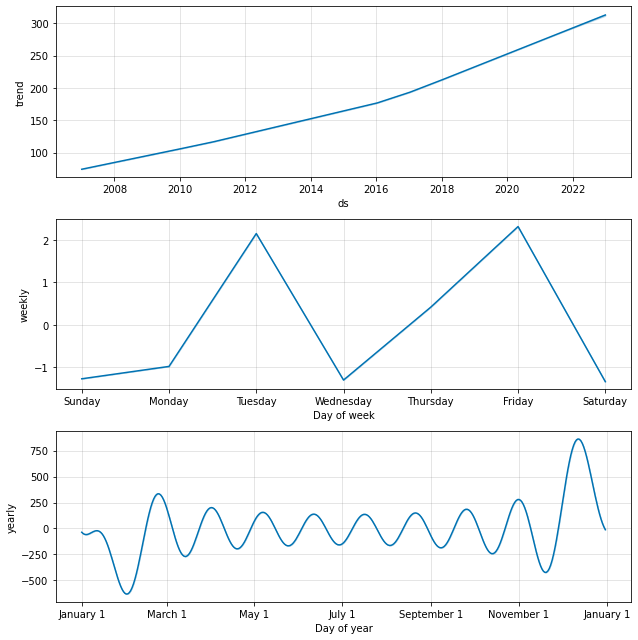

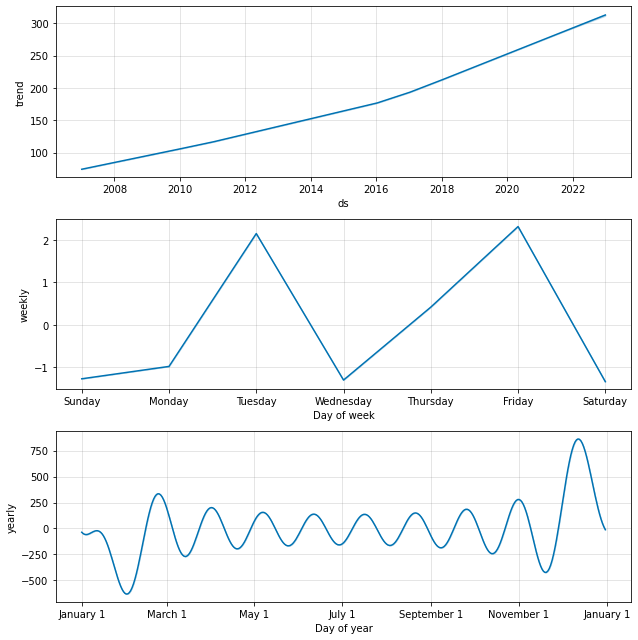

In [ ]:
model.plot_components(fbprophet_prediction)

In [ ]:
from fbprophet.diagnostics import cross_validation
dv_fb= cross_validation(model,initial='730 days',period="180 days",horizon='365 days')
dv_fb.head(5)

INFO:fbprophet:Making 23 forecasts with cutoffs between 2009-03-05 00:00:00 and 2020-01-07 00:00:00


  0%|          | 0/23 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2010-01-01,63.234547,57.609128,69.003241,85,2009-03-05
1,2010-01-01,63.234547,57.595149,68.814435,67,2009-03-05
2,2010-01-02,56.495086,51.073656,61.954499,42,2009-03-05
3,2010-01-02,56.495086,50.817063,62.545931,53,2009-03-05
4,2010-01-03,48.095116,42.985516,53.492778,57,2009-03-05


In [ ]:
from fbprophet.diagnostics import performance_metrics
dv_pm= performance_metrics(dv_fb)
dv_pm.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,131 days,185.067412,13.603948,10.243514,0.136066,0.139499,0.468750
1,132 days,94.033951,9.697110,8.170869,0.128690,0.114922,0.484375
2,133 days,121.057615,11.002619,9.008805,0.131807,0.119118,0.468750
3,134 days,111.611167,10.564619,8.651180,0.124773,0.116298,0.484375
4,135 days,105.410956,10.266984,8.419038,0.120864,0.116298,0.500000


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])

  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])

  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])



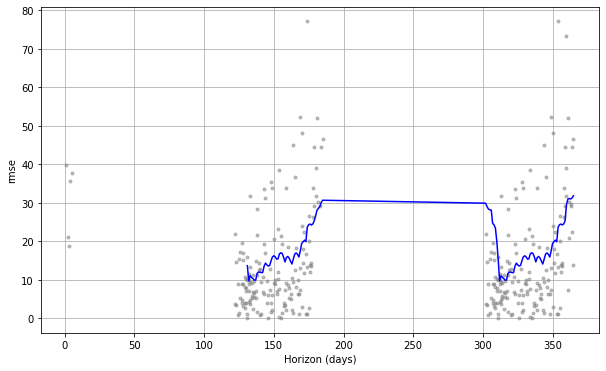

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(dv_fb,metric='rmse')

Neural Prophet

In [ ]:
neuralprophetmodel = NeuralProphet()
metrics= neuralprophetmodel.fit(df,freq='m')

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 91.379% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 91.379% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency m is different than major frequency D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO:NP.config:Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 392
INFO:NP.config:Auto-set epochs to 392


  0%|          | 0/110 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.92E-02, min: 3.33E-01
INFO:NP.utils_torch:lr-range-test results: steep: 1.92E-02, min: 3.33E-01


  0%|          | 0/110 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.29E-01, min: 3.33E-01
INFO:NP.utils_torch:lr-range-test results: steep: 1.29E-01, min: 3.33E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 6.28E-02
INFO:NP.forecaster:lr-range-test selected learning rate: 6.28E-02
Epoch[392/392]: 100%|██████████| 392/392 [00:14<00:00, 27.85it/s, SmoothL1Loss=0.00328, MAE=11.8, RMSE=15.8, Loss=0.00289, RegLoss=0]


In [ ]:
future= neuralprophetmodel.make_future_dataframe(df,periods=24)
future.tail()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 91.379% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 91.379% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency m is different than major frequency D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


,ds,y
19,2022-08-31,None
20,2022-09-30,None
21,2022-10-31,None
22,2022-11-30,None
23,2022-12-31,None


In [ ]:
df.head(5)

,ds,y
0,01-01-2007,51
1,01-02-2007,28
2,01-03-2007,30
3,01-04-2007,32
4,01-05-2007,31


In [ ]:
dfc=df

In [ ]:
forecast=model.predict(df)
forecast.head(4)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-01-01,74.115134,24.136429,63.999623,74.115134,74.115134,-29.014727,-29.014727,-29.014727,-0.977357,-0.977357,-0.977357,-28.037370,-28.037370,-28.037370,0.0,0.0,0.0,45.100407
1,2007-01-02,74.143884,11.577029,51.537529,74.143884,74.143884,-41.845092,-41.845092,-41.845092,2.148854,2.148854,2.148854,-43.993946,-43.993946,-43.993946,0.0,0.0,0.0,32.298792
2,2007-01-03,74.172635,-0.106891,38.531578,74.172635,74.172635,-55.251257,-55.251257,-55.251257,-1.298293,-1.298293,-1.298293,-53.952964,-53.952964,-53.952964,0.0,0.0,0.0,18.921378
3,2007-01-04,74.201386,-2.235780,35.735977,74.201386,74.201386,-58.162209,-58.162209,-58.162209,0.417536,0.417536,0.417536,-58.579746,-58.579746,-58.579746,0.0,0.0,0.0,16.039177


In [ ]:
dfc['yhat'] =forecast['yhat']

In [ ]:
dfc['mse'] = (dfc.y -dfc.yhat)**2

In [ ]:
dfc

,ds,y,yhat,mse
0,01-01-2007,51,45.100407,34.805202
1,01-02-2007,28,32.298792,18.479615
2,01-03-2007,30,18.921378,122.735867
3,01-04-2007,32,16.039177,254.747887
4,01-05-2007,31,17.841769,173.139053
...,...,...,...,...
193,01-02-2021,217,NaN,NaN
194,01-03-2021,183,NaN,NaN
195,01-04-2021,231,NaN,NaN
196,01-05-2021,229,NaN,NaN


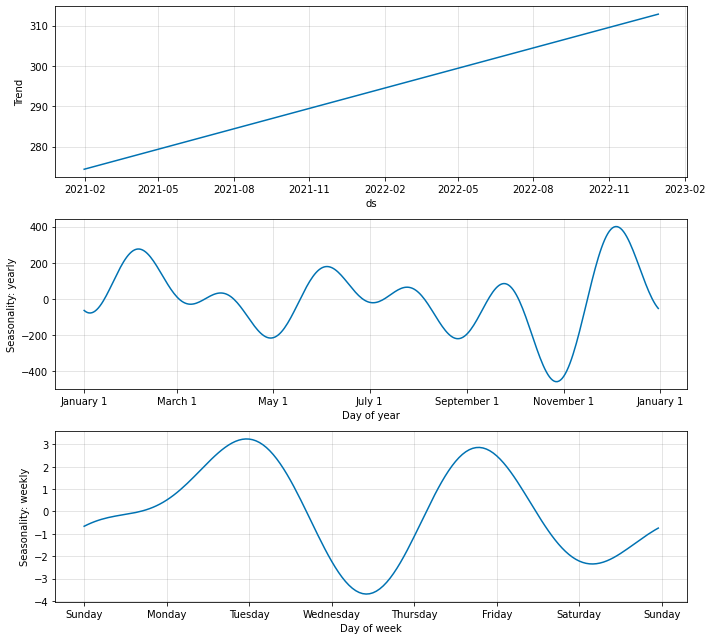

In [ ]:
fig_comp = neuralprophetmodel.plot_components(forecast)

**LSTM**

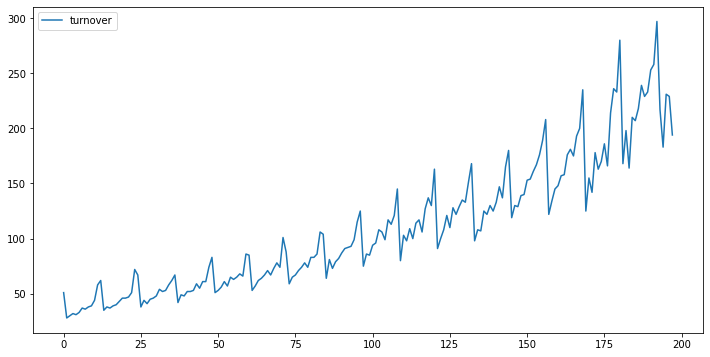

In [ ]:
df.plot(figsize=(12,6))

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df.head(5)

,date,turnover
0,01-01-2007,51
1,01-02-2007,28
2,01-03-2007,30
3,01-04-2007,32
4,01-05-2007,31


In [ ]:
df.date = pd.to_datetime(df.date)

In [ ]:
df.set_index('date')

,turnover
date,
2007-01-01,51
2007-01-02,28
2007-01-03,30
2007-01-04,32
2007-01-05,31
...,...
2021-01-02,217
2021-01-03,183
2021-01-04,231


In [ ]:
df.index.freq = 'MS'

In [ ]:
dataset=df['turnover'].values
dataset = dataset.reshape(-1,1)

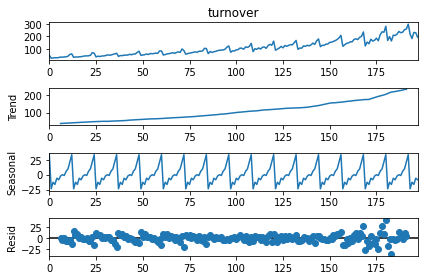

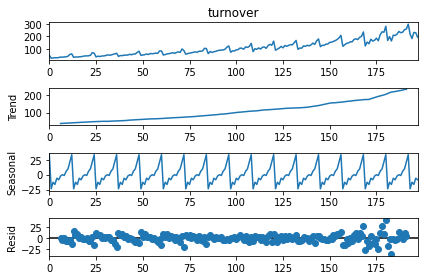

In [ ]:
result= seasonal_decompose(df['turnover'],period=12)
result.plot()

In [ ]:
len(df)

198

In [ ]:
df.info()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.86)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

170 28


In [ ]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',metrics='accuracy')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
166/166 - 2s - loss: 0.0760 - accuracy: 0.0000e+00 - 2s/epoch - 12ms/step
Epoch 2/100
166/166 - 0s - loss: 0.0308 - accuracy: 0.0000e+00 - 264ms/epoch - 2ms/step
Epoch 3/100
166/166 - 0s - loss: 0.0212 - accuracy: 0.0000e+00 - 284ms/epoch - 2ms/step
Epoch 4/100
166/166 - 0s - loss: 0.0173 - accuracy: 0.0000e+00 - 262ms/epoch - 2ms/step
Epoch 5/100
166/166 - 0s - loss: 0.0141 - accuracy: 0.0000e+00 - 271ms/epoch - 2ms/step
Epoch 6/100
166/166 - 0s - loss: 0.0110 - accuracy: 0.0000e+00 - 269ms/epoch - 2ms/step
Epoch 7/100
166/166 - 0s - loss: 0.0083 - accuracy: 0.0000e+00 - 274ms/epoch - 2ms/step
Epoch 8/100
166/166 - 0s - loss: 0.0065 - accuracy: 0.0000e+00 - 263ms/epoch - 2ms/step
Epoch 9/100
166/166 - 0s - loss: 0.0053 - accuracy: 0.0000e+00 - 265ms/epoch - 2ms/step
Epoch 10/100
166/166 - 0s - loss: 0.0045 - accuracy: 0.0000e+00 - 275ms/epoch - 2ms/step
Epoch 11/100
166/166 - 0s - loss: 0.0041 - accuracy: 0.0000e+00 - 287ms/epoch - 2ms/step
Epoch 12/100
166/166 - 0s - loss

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
trainY.shape

(1, 168)

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_absolute_percentage_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f MAPE' % (trainScore))
testScore = np.sqrt(mean_absolute_percentage_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f MAPE' % (testScore))

1/1 [==============================] - 0s 18ms/step
Train Score: 3.51 MAPE
Test Score: 3.85 MAPE


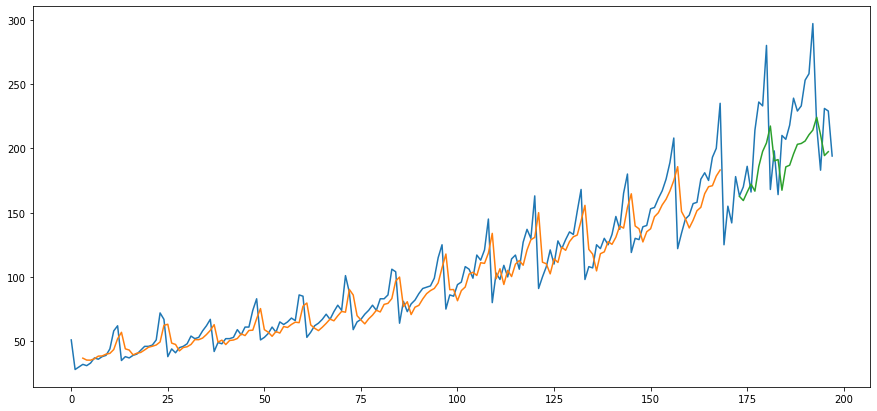

In [ ]:
plt.figure(figsize=(15,7))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()